In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [25]:
class_labels=['''T-shirt/top"," Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot",
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot''']

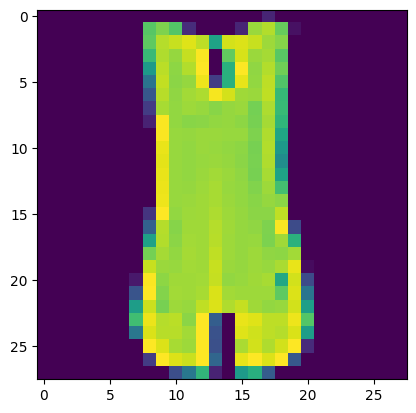

In [7]:
plt.imshow(X_train[4])

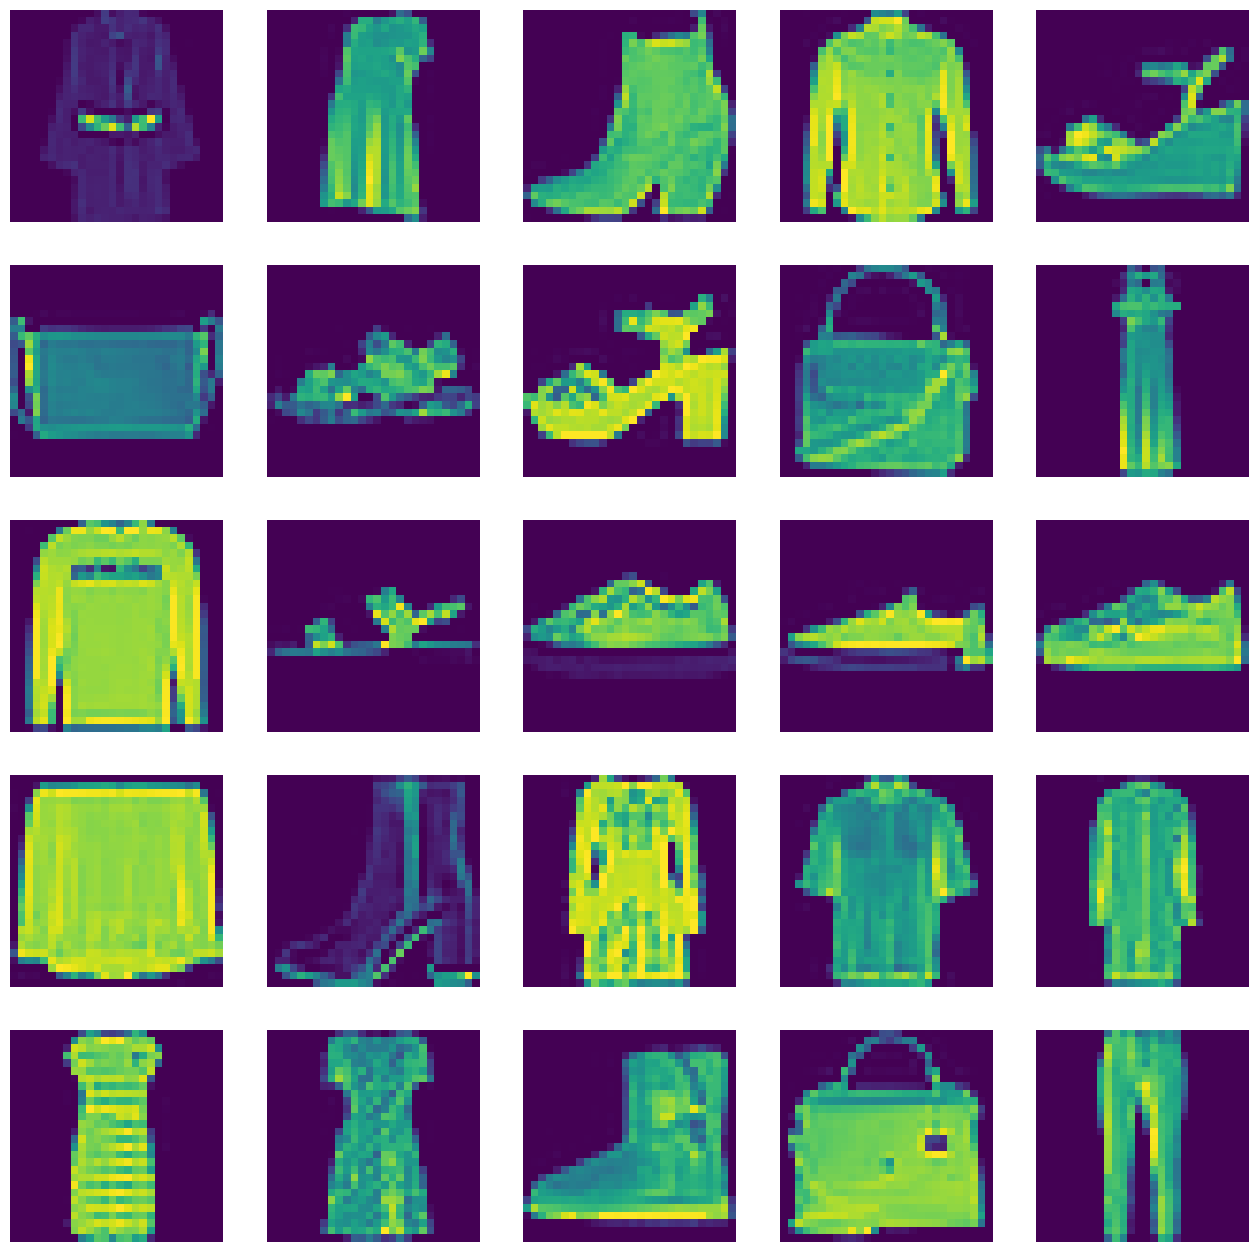

In [8]:
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0,1000,25):
        plt.subplot(5, 5, j);j+=1
        plt.imshow(X_train[i])
        plt.axis('off')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=51)

In [10]:
model=keras.models.Sequential([
          keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Flatten(),
          keras.layers.Dense(units=128,activation='relu'),
          keras.layers.Dense(units=10,activation='softmax')
])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.1842 - loss: 8.1189 - val_accuracy: 0.1725 - val_loss: 8.1603
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.1741 - loss: 8.1972 - val_accuracy: 0.1746 - val_loss: 8.2124
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.1794 - loss: 8.1189 - val_accuracy: 0.1745 - val_loss: 8.1894
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.1769 - loss: 8.1537 - val_accuracy: 0.1769 - val_loss: 8.2321
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.1825 - loss: 8.2393 - val_accuracy: 0.2407 - val_loss: 8.1440
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.2198 - loss: 8.6282 - val_accuracy: 0.0995 - val_loss: 11.0169
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.1012 - loss: 11.1029 - val_accuracy: 0.0995 - val_loss: 11.0169
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.1015 - loss: 11.0129 - val_accuracy: 0.099

In [12]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [13]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


np.int64(5)

In [14]:
y_test[0]

np.uint8(9)

In [15]:
y_pred=model.predict(X_test).round(2)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [18]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0326 - loss: 47.9017


[48.00054931640625, 0.03530000150203705]

In [19]:
print(f"y_pred[{i}] shape:", y_pred[i].shape)


y_pred[542] shape: (10,)


Index: 646, y_test[646]: 0, y_pred[646]: [0.   0.   0.   0.   0.88 0.12 0.   0.   0.   0.  ]
Error at index 646: list index out of range
Index: 544, y_test[544]: 0, y_pred[544]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Error at index 544: list index out of range
Index: 325, y_test[325]: 6, y_pred[325]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Error at index 325: list index out of range
Index: 534, y_test[534]: 8, y_pred[534]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Error at index 534: list index out of range
Index: 730, y_test[730]: 9, y_pred[730]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Error at index 730: list index out of range
Index: 442, y_test[442]: 8, y_pred[442]: [0.   0.   0.   0.   0.24 0.76 0.   0.   0.   0.  ]
Error at index 442: list index out of range
Index: 946, y_test[946]: 5, y_pred[946]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Error at index 946: list index out of range
Index: 716, y_test[716]: 6, y_pred[716]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Error at index 716: list index out of range
Index: 949, y_test[949]:

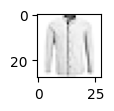

In [20]:
j = 1
for i in np.random.randint(0, 1000, 25):
    try:
        print(f"Index: {i}, y_test[{i}]: {y_test[i]}, y_pred[{i}]: {y_pred[i]}")
        plt.subplot(5, 5, j)
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
        plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(
            class_labels[y_test[i]], y_test[i],
            class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])
        ))
        plt.axis('off')
        j += 1
    except IndexError as e:
        print(f"Error at index {i}: {e}")


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


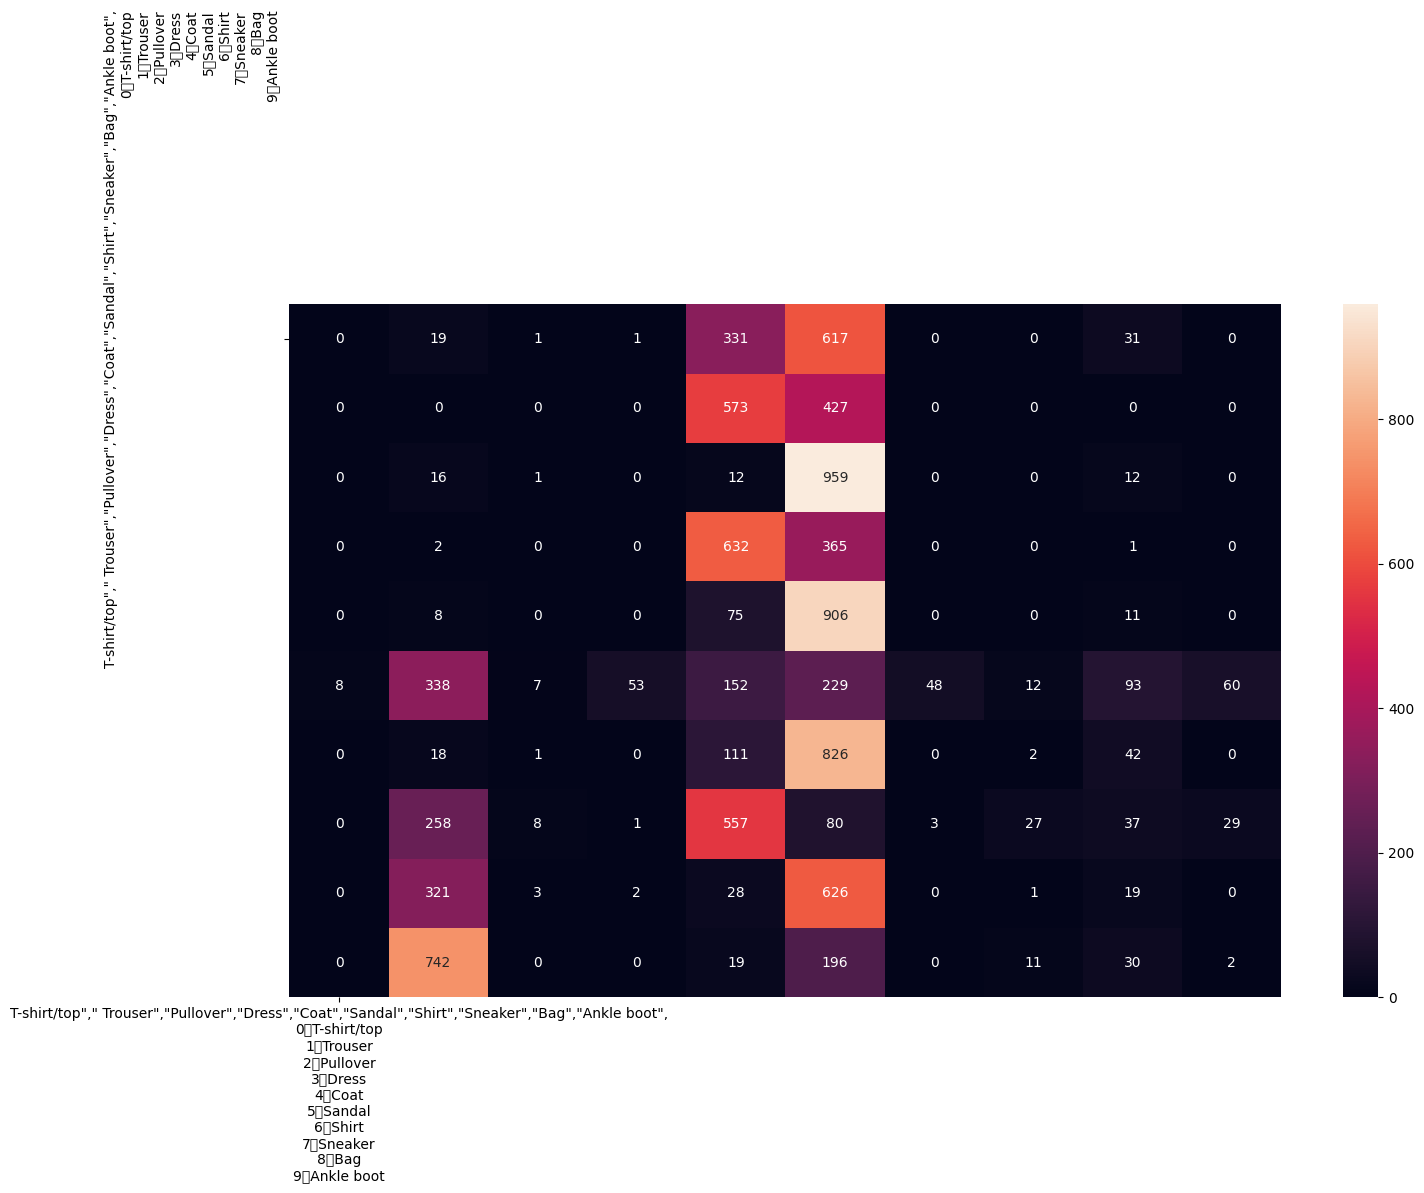

In [21]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [27]:
class_labels = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 
                'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

In [28]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00      1000
     class_1       0.00      0.00      0.00      1000
     class_2       0.05      0.00      0.00      1000
     class_3       0.00      0.00      0.00      1000
     class_4       0.03      0.07      0.04      1000
     class_5       0.04      0.23      0.07      1000
     class_6       0.00      0.00      0.00      1000
     class_7       0.51      0.03      0.05      1000
     class_8       0.07      0.02      0.03      1000
     class_9       0.02      0.00      0.00      1000

    accuracy                           0.04     10000
   macro avg       0.07      0.04      0.02     10000
weighted avg       0.07      0.04      0.02     10000



In [31]:
model.save("fashion_classification_ccn-model.h5")

In [32]:
model_deploy=keras.models.load_model("fashion_classification_ccn-model.h5")

In [33]:
model_deploy.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [35]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


np.int64(5)

In [ ]:
cnn_model13=keras.models.sequential([
    keras.layer.conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu')
    keras.layer.maxpooling2D(pool_size=(2,2)),
    keras.layer.conv2D(filters=128,kernel_size=3,strides=(3,3),padding='same',activation='softmax')
])